#### 무게를 찾기
- 목표      : 농어 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋  : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight

[1] 데이터 준비 및 피쳐/타겟 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FILE=r'C:\Users\kdp\Desktop\KDW\EX_Machine_Learning\data\fish.csv'
fishDF=pd.read_csv(DATA_FILE, usecols=[0,1,2])
PerchDF=fishDF[fishDF['Species']=='Perch']
PerchDF.reset_index(drop=True, inplace=True)
PerchDF=PerchDF.drop('Species', axis=1)
PerchDF.head()

,Weight,Length
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4


In [3]:
PerchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [4]:
features=PerchDF['Length']
target=PerchDF['Weight']
print(f'features => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (56,), 1D
target => (56,), 1D


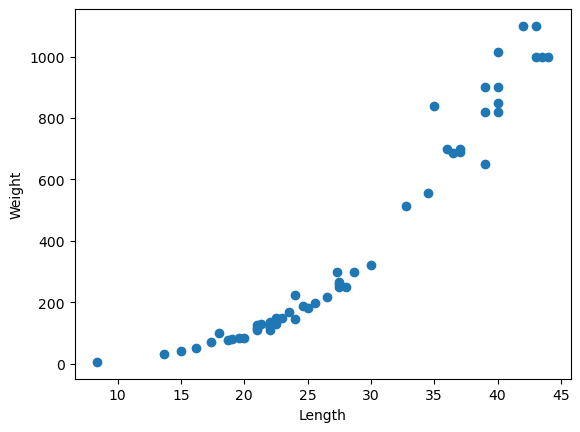

In [5]:
plt.scatter(features,target)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

[2] 학습 준비
- 학습알고리즘: KNN Regressor
- 피쳐 스케일링
- 학습용/테스트용 데이터셋 분리

[2-1] 피쳐와 타겟 분리

In [6]:
featureDF=PerchDF[['Length']]
targetSR=PerchDF['Weight']

print(f'featureDF : {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR : {targetSR.shape}, {targetSR.ndim}D')

featureDF : (56, 1), 2D
targetSR : (56,), 1D


[2-2] 학습용 & 테스트용 데이터셋 분리
* 전체 데이터셋 => 학습용 : 테스트용 = 75:25, 80:20, 70:30
* 회귀 데이터셋 => 데이터셋 구성 요소에 대한 비율 고려 X

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR, random_state=10)

In [9]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D, Y_train : {Y_train.shape}, {Y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D, Y_test : {Y_test.shape}, {Y_test.ndim}D')

X_train : (42, 1), 2D, Y_train : (42,), 1D
X_test : (14, 1), 2D, Y_test : (14,), 1D


In [10]:
X_train=X_train.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# 스케일러 인스턴스 생성
mmScaler=MinMaxScaler()

In [13]:
# 스케일러에 데이터셋 전용의 속성값 설정
mmScaler.fit(X_train)

MinMaxScaler()

In [14]:
mmScaler.min_, mmScaler.scale_, mmScaler.data_min_, mmScaler.data_max_

(array([-0.23595506]), array([0.02808989]), array([8.4]), array([44.]))

In [15]:
# 학습용, 테스트용 데이터셋 스케일링 진행
X_train_scaled=mmScaler.fit_transform(X_train)
X_test_scaled=mmScaler.fit_transform(X_test)

[3] 학습 진행

In [16]:
from sklearn.neighbors import KNeighborsRegressor

# 학습 모델 인스턴스 생성
model=KNeighborsRegressor(n_neighbors=2)

# 학습용 데이터셋으로 학습 진행
model.fit(X_train_scaled, Y_train)

KNeighborsRegressor(n_neighbors=2)

In [17]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 42, 'euclidean', {})

[4] 최적의 K 찾기

In [18]:
scores={}

for k in range(1, model.n_samples_fit_+1):
    # 최근접 이웃의 갯수 설정 <== 모델 성능 좌우 : 하이퍼파라미터
    model.n_neighbors=k

    # 성능 평가
    score=model.score(X_test_scaled, Y_test)
    
    scores[k]=score

In [19]:
list(scores.values())

[0.7632595115860443,
 0.8897562608890713,
 0.8832662394181376,
 0.8828653835940388,
 0.8765631257617547,
 0.8827356324340021,
 0.8986848610276597,
 0.887302333873422,
 0.910540553058149,
 0.8984897116995403,
 0.8907182637387656,
 0.8768012793895542,
 0.8561278423072497,
 0.8309590275390086,
 0.8510977871150786,
 0.8686833559518643,
 0.8482519495822388,
 0.8316207083105919,
 0.8402908305520266,
 0.8238569321079983,
 0.8122699220332621,
 0.8224580669332893,
 0.8303194239817249,
 0.8225574300565782,
 0.8165343992233748,
 0.8062505305476464,
 0.7764419760006347,
 0.7429624415580012,
 0.7027609848410492,
 0.6523684534795,
 0.6020905426527672,
 0.5262660279694543,
 0.4629580105807817,
 0.3641736123996401,
 0.2510659055982484,
 0.16336914747470765,
 0.05745336451571459,
 -0.09236769294712488,
 -0.233153164834901,
 -0.3814682396409934,
 -0.5265425622090913,
 -0.6266233871157569]

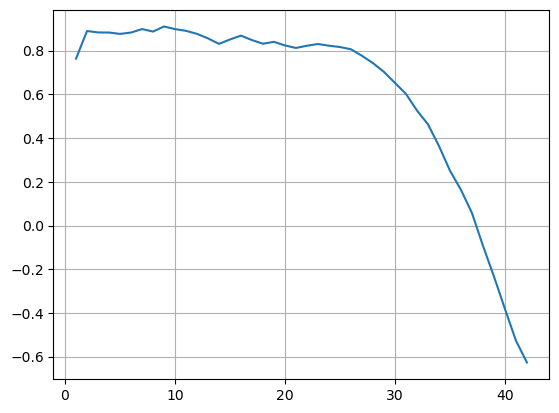

In [20]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.grid()
plt.show()

In [21]:
# 최고 성능의 k값                        x=(key,value)
best_k=sorted(scores.items(),key=lambda x: x[1], reverse=True)[0][0]
best_k

9

In [22]:
# 모델에 적용 => n_neighbors에 설정
model.n_neighbors=best_k

[5] 새로운 데이터의 무게 예측하기

In [23]:
new_length=input("농어 길이 : ")
print(f'new length : {new_length}')

new length : 44


In [24]:
# 2D DataFrame
dataDF=pd.DataFrame([[new_length]], columns=['Length'])
dataDF

,Length
0,44


In [25]:
# 피쳐 스케일링
data_scaled=mmScaler.transform(dataDF)
data_scaled

array([[1.20833333]])

In [26]:
# 예측
model.predict(data_scaled)

array([976.11111111])

In [27]:
distance, index= model.kneighbors(data_scaled)
print(distance, index, sep='\n')

[[0.20833333 0.22237828 0.23642322 0.23642322 0.26451311 0.32069288
  0.32069288 0.32069288 0.32069288]]
[[31 27  3 30 15 37 33 12  7]]


In [28]:
X_train_scaled[[31,27,30,3,15,12]]

array([[1.        ],
       [0.98595506],
       [0.97191011],
       [0.97191011],
       [0.94382022],
       [0.88764045]])

In [29]:
Y_train.index

RangeIndex(start=0, stop=42, step=1)

In [30]:
Y_train[index.reshape(-1)].sum()/model.n_neighbors

976.1111111111111

##### KNN Regressor 문제점/단점

In [31]:
# 임의의 데이터
new_length= 5

# 2D DataFrame
dataDF=pd.DataFrame([new_length], columns=['Length'])

data_scaled=mmScaler.transform(dataDF)

In [32]:
model.predict(data_scaled)

array([71.76666667])

=> 학습 데이터셋의 범위를 벗어난 더 큰 데이터, 더 작은 데이터의 경우  

정확한 예측 불가!!